## Understanding Effect of Conv and Pool

In [1]:
import cv2
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

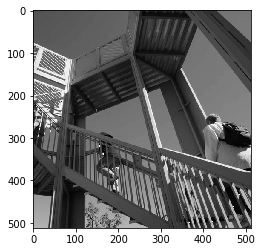

In [18]:
ascent = misc.ascent()
plt.gray()
plt.imshow(ascent)

In [4]:
print ("height and width of the image:", ascent.shape)

height and width of the image: (512, 512)


In [15]:
ascent_copy = np.copy(ascent)
xarr = ascent_copy.shape[0]
yarr = ascent_copy.shape[1]

print ("check sizes:", (xarr, yarr))

check sizes: (512, 512)


#### Some Common Filters as Defined in Andrew Ng's First Lecture of CNN Course

In [35]:
filter1 = np.array([ [-1, -5, -2], [0, 0, 0], [1, 5, 2]])  # vertical edge
filter2 = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]]) # horizontal edge

Leave one pixel at the boundary and then perform the usual convolution. If all the digits in the filter do not add up to 0 or 1 then we should normalize by dividing by the total sum. Check the [Stanford Github Repo](http://cs231n.github.io/convolutional-networks/) for better understanding. 

Here is my very basic representation of what's going on ![covdemo](convdemo.png)

In [36]:
weight = 1

for x in range(1,xarr-1):
    for y in range(1,yarr-1):
        convolution = 0.0
        convolution = convolution + (ascent[x - 1, y-1] * filter1[0][0])
        convolution = convolution + (ascent[x, y-1] * filter1[0][1])
        convolution = convolution + (ascent[x + 1, y-1] * filter1[0][2])
        convolution = convolution + (ascent[x-1, y] * filter1[1][0])
        convolution = convolution + (ascent[x, y] * filter1[1][1])
        convolution = convolution + (ascent[x+1, y] * filter1[1][2])
        convolution = convolution + (ascent[x-1, y+1] * filter1[2][0])
        convolution = convolution + (ascent[x, y+1] * filter1[2][1])
        convolution = convolution + (ascent[x+1, y+1] * filter1[2][2])
        convolution = convolution * weight
        if(convolution<0):
            convolution=0
        if(convolution>255):
            convolution=255
        ascent_copy[x, y] = convolution

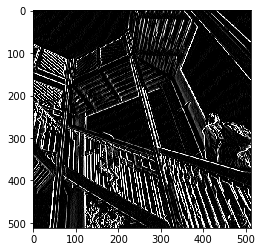

In [37]:
# Plot the image. Note the size of the axes -- they are 512 by 512
plt.gray()
plt.imshow(ascent_copy)
plt.show()   

#### Check the effect of Pooling 
At least with maxpool and filter size (2, 2) we expect the image size to go down to half. For max pooling with filter size (2, 2) we concentrate on 1 pixel of the image and then look for pixel values immediately to right, down and right down, and choose the maximum value.  

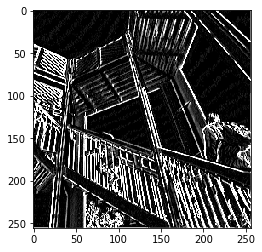

In [41]:
new_x = int(xarr/2)
new_y = int(yarr/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, xarr, 2):
    for y in range(0, yarr, 2):
        pixels = []
        pixels.append(ascent_copy[x, y])
        pixels.append(ascent_copy[x+1, y])
        pixels.append(ascent_copy[x, y+1])
        pixels.append(ascent_copy[x+1, y+1])
        newImage[int(x/2),int(y/2)] = max(pixels)

# Plot the image. Note the size of the axes -- now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
#plt.axis('off')
plt.show()      

Apart from the image size being reduced to half somehow the image look more sharp! 